In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import statistics
import itertools

%matplotlib inline

In [2]:
def generate_box_plots(runtime, parameters, snaps):
    for par in parameters:
        data = []
        label = []
        for snap in snaps:
            cpu = runtime[f'cpu_{snap}_{par}'][2:]
            gpu = runtime[f'gpu_{snap}_{par}'][2:]
            if par == 'maxmem':
                cpu = np.array(cpu)/(1024)**3
                gpu = np.array(gpu)/(1024)**3
            data.append(cpu)
            label.append(f'cpu_snaps_{snap}')
            data.append(gpu)
            label.append(f'gpu_snaps_{snap}')
        
        fig = plt.figure(figsize =(10, 6))
        ax = fig.add_subplot(111)
        # Creating axes instance
        bp = ax.boxplot(data, patch_artist = True,
                        notch = False, vert = 0)

        colors = ['tab:blue', 'tab:green', 'tab:blue', 'tab:green', 'tab:blue', 'tab:green']
        colors_median = ['red', 'orange', 'red', 'orange', 'red', 'orange']

        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)

        # changing color and linewidth of
        # whiskers
        for whisker in bp['whiskers']:
            whisker.set(color ='#8B008B',
                        linewidth = 1.5,
                        linestyle =":")

        # changing color and linewidth of
        # caps
        for cap in bp['caps']:
            cap.set(color ='#8B008B',
                    linewidth = 2)

        # changing color and linewidth of
        # medians
        for median, color in zip(bp['medians'], colors_median):
            median.set(color = color,
                       linewidth = 3)

        # changing style of fliers
        for flier in bp['fliers']:
            flier.set(marker ='D',
                      color ='#e7298a',
                      alpha = 0.5)

        # x-axis labels
        ax.set_yticklabels(label, fontsize=16)
        ax.tick_params(axis='x', labelsize=16)
        if par == 'infsetup':
            ax.xaxis.set_major_formatter(FormatStrFormatter('%.5f'))
        elif par == 'inference':
            ax.xaxis.set_major_formatter(FormatStrFormatter('%.4f'))
        elif par == 'netsetup':
            ax.xaxis.set_major_formatter(FormatStrFormatter('%.4f'))
        else:
            ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

        # Adding title
        plt.title(par, fontsize=16)

        # Removing top axes and right axes
        # ticks
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()

        # show plot
        plt.show(bp)

In [3]:
filehandler = open('GP_runtime_datascaling.pkl', 'rb')
gp_runtime = pickle.load(filehandler)

In [4]:
for name, numbers in gp_runtime.items():
    print('Item:', name, 'Used', len(numbers), 'times')
    print('\tMEDIAN', statistics.median(numbers))
    print('\tMEAN  ', statistics.mean(numbers))
    print('\tMAX ', max(numbers))
    print('\tMIN ', min(numbers))

Item: cpu_1_maxmem Used 15 times
	MEDIAN 0
	MEAN   0
	MAX  0
	MIN  0
Item: cpu_1_netsetup Used 15 times
	MEDIAN 0.0009300708770751953
	MEAN   0.000934759775797526
	MAX  0.0009684562683105469
	MIN  0.0009169578552246094
Item: cpu_1_infsetup Used 15 times
	MEDIAN 0.00011301040649414062
	MEAN   0.00011579195658365886
	MAX  0.00012683868408203125
	MIN  0.00011181831359863281
Item: cpu_1_inference Used 15 times
	MEDIAN 0.9417374134063721
	MEAN   0.9778521537780762
	MAX  1.4872701168060303
	MIN  0.9373815059661865
Item: cpu_2_maxmem Used 13 times
	MEDIAN 0
	MEAN   0
	MAX  0
	MIN  0
Item: cpu_2_netsetup Used 13 times
	MEDIAN 0.0009446144104003906
	MEAN   0.0009419367863581731
	MAX  0.0009682178497314453
	MIN  0.000919342041015625
Item: cpu_2_infsetup Used 13 times
	MEDIAN 0.00011301040649414062
	MEAN   0.00011517451359675481
	MAX  0.0001251697540283203
	MIN  0.000110626220703125
Item: cpu_2_inference Used 13 times
	MEDIAN 3.3309578895568848
	MEAN   3.3762675798856296
	MAX  4.134819746017456
	

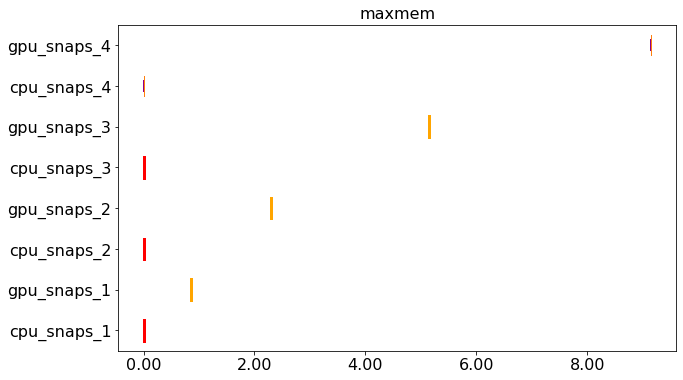

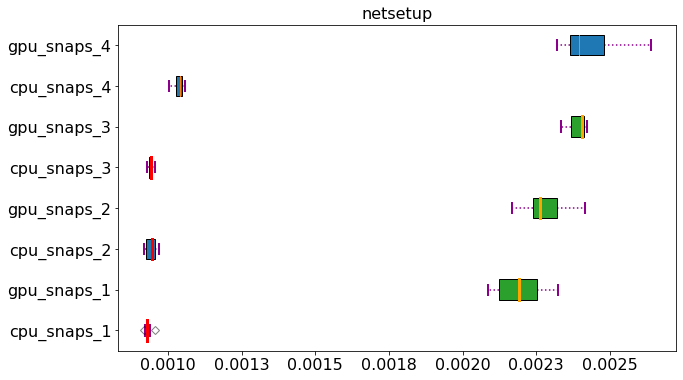

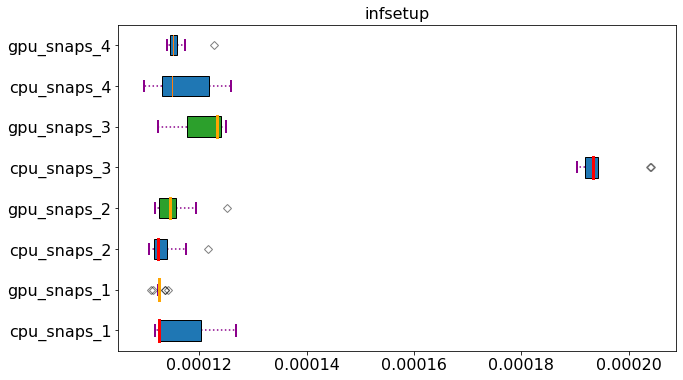

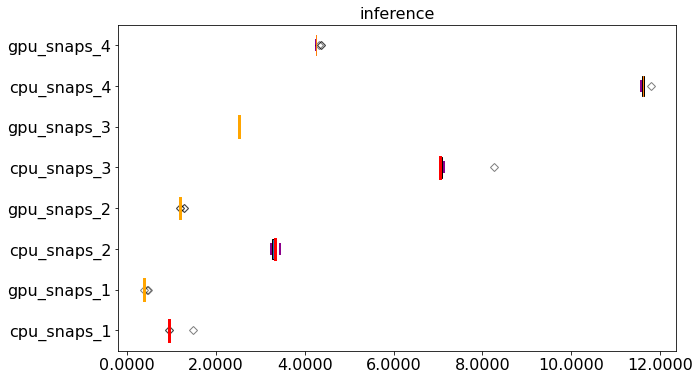

In [5]:
snaps = ["1", "2", "3", "4"]
par = ["maxmem", "netsetup", "infsetup", "inference"]
generate_box_plots(gp_runtime, par, snaps)

In [6]:
gp_inference_rbf = []
for snap in snaps:
    gpu = statistics.median(gp_runtime[f'gpu_{snap}_inference'])
    gp_inference_rbf.append(gpu)
    
gp_inference_rbf_cpu = []
for snap in snaps:
    cpu = statistics.median(gp_runtime[f'cpu_{snap}_inference'])
    gp_inference_rbf_cpu.append(cpu)
    
gp_inference_rbf = np.array(gp_inference_rbf)
gp_inference_rbf_cpu = np.array(gp_inference_rbf_cpu)

In [7]:
gp_inference_rbf

array([0.36621308, 1.18256938, 2.52062035, 4.24504352])

In [8]:
N = np.array([8748*1, 8748*2, 8748*3, 8748*4])

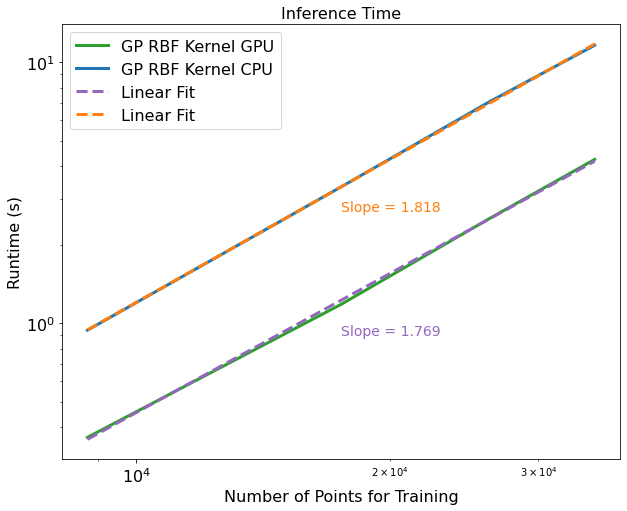

In [9]:
mlog1, blog1 = np.polyfit(np.log(N), np.log(gp_inference_rbf), 1)
ydata1 = np.exp(mlog1*np.log(N) + blog1)

mlog2, blog2 = np.polyfit(np.log(N), np.log(gp_inference_rbf_cpu), 1)
ydata2 = np.exp(mlog2*np.log(N) + blog2)

#plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize =(10, 8))
ax = plt.axes()
ax.plot(N, gp_inference_rbf, color='tab:green', linestyle='-', label='GP RBF Kernel GPU', linewidth=3)
ax.plot(N, gp_inference_rbf_cpu, color='tab:blue', linestyle='-', label='GP RBF Kernel CPU', linewidth=3)

ax.plot(N, ydata1, linestyle='--', color='tab:purple', label='Linear Fit', linewidth=3)
plt.text(8748*2, 0.9, "Slope = {:.3f}".format(mlog1), fontsize=14, color='tab:purple')

ax.plot(N, ydata2, linestyle='--', color='tab:orange', label='Linear Fit', linewidth=3)
plt.text(8748*2, 2.7, "Slope = {:.3f}".format(mlog2), fontsize=14, color='tab:orange')

plt.title("Inference Time", fontsize=16)
plt.xlabel("Number of Points for Training", fontsize=16)
plt.ylabel("Runtime (s)", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.yscale('log')
plt.xscale('log')

In [10]:
nn_memory = np.array([78947, 78947, 78947, 78947])/1024

gp_memory_rbf = []
for snap in snaps:
    gpu = statistics.median(gp_runtime[f'gpu_{snap}_maxmem'])
    gp_memory_rbf.append(gpu)
    
gp_memory_rbf = np.array(gp_memory_rbf)/1024**2

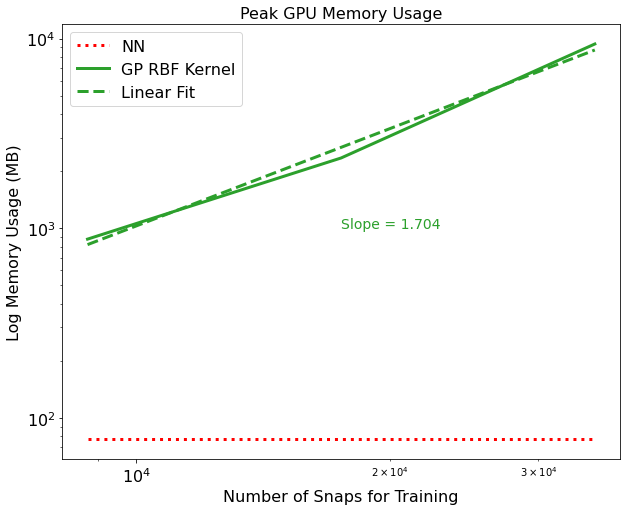

In [11]:
mlog, blog = np.polyfit(np.log(N), np.log(gp_memory_rbf), 1)
ydata = np.exp(mlog*np.log(N) + blog)

#plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize =(10, 8))
ax = plt.axes()
ax.plot(N, nn_memory, color='red', linestyle=':', label='NN', linewidth=3)
ax.plot(N, gp_memory_rbf, color='tab:green', linestyle='-', label='GP RBF Kernel', linewidth=3)
ax.plot(N, ydata, linestyle='--', color='tab:green', label='Linear Fit', linewidth=3)
plt.text(8748*2, 1e3, "Slope = {:.3f}".format(mlog), fontsize=14, color='tab:green')
plt.title("Peak GPU Memory Usage", fontsize=16)
plt.xlabel("Number of Snaps for Training", fontsize=16)
plt.ylabel("Log Memory Usage (MB)", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.yscale('log')
plt.xscale('log')

# Without Fast Pred

In [12]:
filehandler = open('GP_runtime_datascaling_wo_fastpred.pkl', 'rb')
gp_runtime = pickle.load(filehandler)

In [13]:
for name, numbers in gp_runtime.items():
    print('Item:', name, 'Used', len(numbers), 'times')
    print('\tMEDIAN', statistics.median(numbers))
    print('\tMEAN  ', statistics.mean(numbers))
    print('\tMAX ', max(numbers))
    print('\tMIN ', min(numbers))

Item: cpu_1_maxmem Used 28 times
	MEDIAN 0.0
	MEAN   0
	MAX  0
	MIN  0
Item: cpu_1_netsetup Used 28 times
	MEDIAN 0.0009816884994506836
	MEAN   0.0009815778051103865
	MAX  0.0009953975677490234
	MIN  0.0009639263153076172
Item: cpu_1_infsetup Used 28 times
	MEDIAN 0.00011396408081054688
	MEAN   0.0001160672732761928
	MAX  0.00012969970703125
	MIN  0.0001125335693359375
Item: cpu_1_inference Used 28 times
	MEDIAN 15.846509218215942
	MEAN   15.871247359684535
	MAX  16.384531259536743
	MIN  15.834487438201904
Item: cpu_2_maxmem Used 23 times
	MEDIAN 0
	MEAN   0
	MAX  0
	MIN  0
Item: cpu_2_netsetup Used 23 times
	MEDIAN 0.0009891986846923828
	MEAN   0.0009879858597465184
	MAX  0.0010173320770263672
	MIN  0.0009608268737792969
Item: cpu_2_infsetup Used 23 times
	MEDIAN 0.00011420249938964844
	MEAN   0.0001162757044253142
	MAX  0.00012922286987304688
	MIN  0.00011157989501953125
Item: cpu_2_inference Used 23 times
	MEDIAN 33.17185926437378
	MEAN   33.18132695944413
	MAX  33.23834586143494
	M

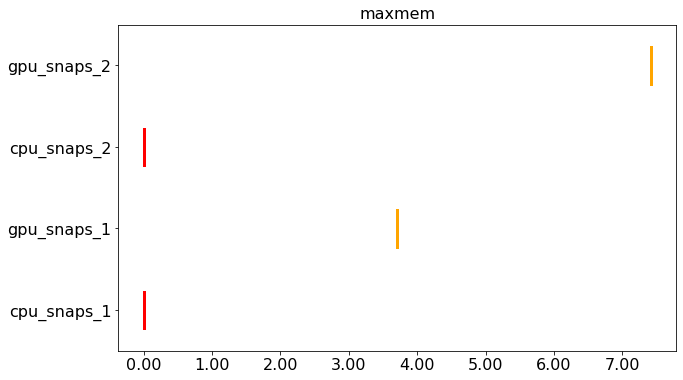

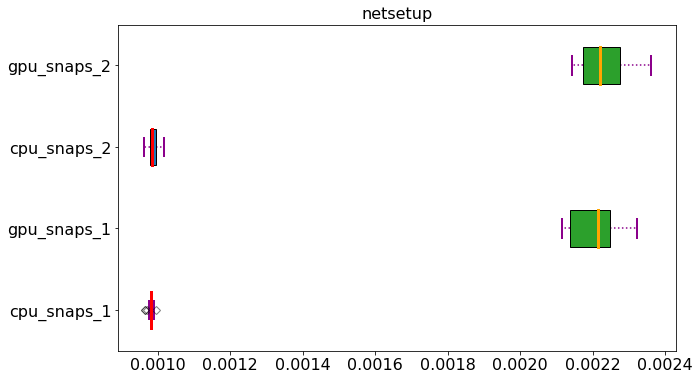

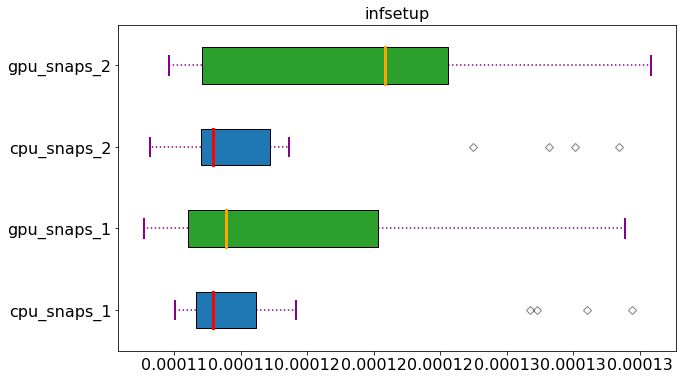

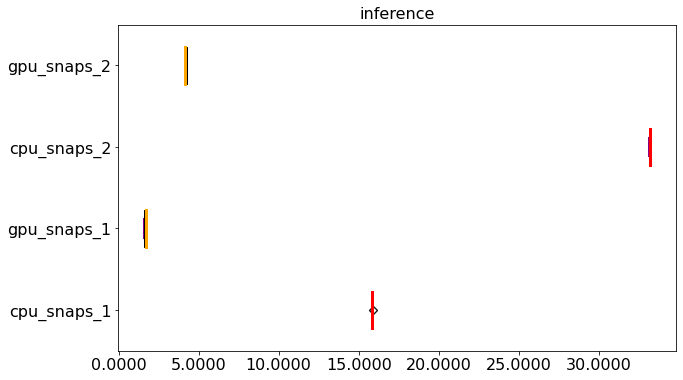

In [14]:
snaps = ["1", "2"]
par = ["maxmem", "netsetup", "infsetup", "inference"]
generate_box_plots(gp_runtime, par, snaps)

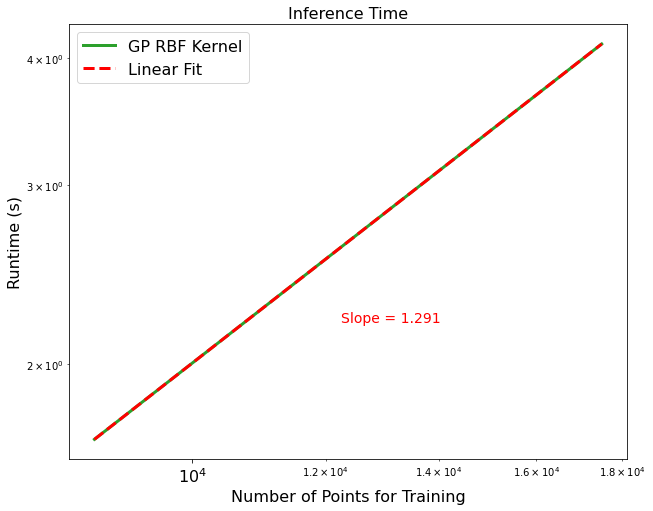

In [15]:
gp_inference_rbf = []
for snap in snaps:
    gpu = statistics.median(gp_runtime[f'gpu_{snap}_inference'])
    gp_inference_rbf.append(gpu)
    
gp_inference_rbf = np.array(gp_inference_rbf)
N = np.array([8748*1, 8748*2])

mlog, blog = np.polyfit(np.log(N), np.log(gp_inference_rbf), 1)
ydata = np.exp(mlog*np.log(N) + blog)

#plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize =(10, 8))
ax = plt.axes()
ax.plot(N, gp_inference_rbf, color='tab:green', linestyle='-', label='GP RBF Kernel', linewidth=3)
ax.plot(N, ydata, linestyle='--', color='red', label='Linear Fit', linewidth=3)
plt.text(8748*1.4, 2.2, "Slope = {:.3f}".format(mlog), fontsize=14, color='red')
plt.title("Inference Time", fontsize=16)
plt.xlabel("Number of Points for Training", fontsize=16)
plt.ylabel("Runtime (s)", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.yscale('log')
plt.xscale('log')

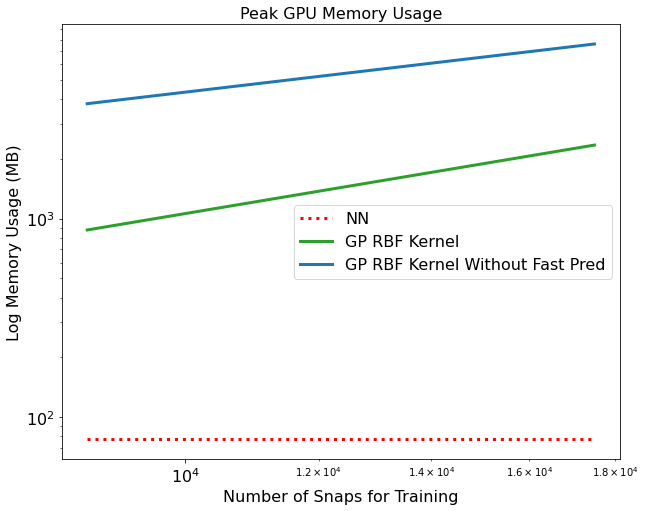

In [16]:
nn_memory = np.array([78947, 78947])/1024

gp_memory_rbf_fp = []
for snap in snaps:
    gpu = statistics.median(gp_runtime[f'gpu_{snap}_maxmem'])
    gp_memory_rbf_fp.append(gpu)
    
gp_memory_rbf_fp = np.array(gp_memory_rbf_fp)/1024**2

#plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize =(10, 8))
ax = plt.axes()
ax.plot(N, nn_memory, color='red', linestyle=':', label='NN', linewidth=3)
ax.plot(N, gp_memory_rbf[0:2], color='tab:green', linestyle='-', label='GP RBF Kernel', linewidth=3)
ax.plot(N, gp_memory_rbf_fp, color='tab:blue', linestyle='-', label='GP RBF Kernel Without Fast Pred', linewidth=3)
plt.title("Peak GPU Memory Usage", fontsize=16)
plt.xlabel("Number of Snaps for Training", fontsize=16)
plt.ylabel("Log Memory Usage (MB)", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.yscale('log')
plt.xscale('log')

In [17]:
gp_memory_rbf_fp

array([3797.20947266, 7593.97802734])

In [18]:
gp_memory_rbf[0:2]

array([ 876.34082031, 2348.29345703])